**به نام خداوند مهربان**

Project Title:


***Quantum Neural Network (QNN) Regressor for Predictive Analysis of Target Variable***

Description:
This project aims to develop a Quantum Neural Network (QNN) regressor model to accurately predict a specified target variable using a unique dataset. Quantum Neural Networks leverage the principles of quantum computing to enhance the capability of traditional neural network models, particularly in handling complex patterns and high-dimensional data spaces.

The dataset consists of various numerical features, labeled A through O, and the goal is to construct a QNN that can process this data to make predictions about the 'Target' variable. The project will involve preprocessing the classical data to be compatible with quantum processing, encoding it into quantum states, and then developing a QNN architecture that can be trained on a quantum simulator or quantum computer.

The project will consist of several phases, including data exploration to understand the distribution and correlations of the features, normalization and standardization of data, selection and implementation of quantum feature maps for data encoding, designing the QNN architecture, and evaluating the model's performance using metrics appropriate for regression tasks. We will also compare the QNN model's performance with classical machine learning regressor models to quantify the benefits of quantum-enhanced predictions.

With the growing interest in quantum computing's potential for machine learning, this project is positioned at the forefront of an emerging field, combining quantum algorithms with neural network architectures to pave the way for the next generation of predictive models.o the volatile cryptocurrency market.

Author:**Dr. Mahdi Pourabdollah**
Contact Information:


**+989105557133**


    

In [ ]:
pip install qulacsvis

In [ ]:
pip install skqulacs

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from skqulacs.circuit.pre_defined import create_qcl_ansatz # Prefer to choose this circuit
from skqulacs.circuit import create_ibm_embedding_circuit
from skqulacs.qnn.solver import Bfgs, Adam, NelderMead
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Import quantum libraries and modules as needed, assuming they're installed in your environment
from skqulacs.qnn import QNNRegressor
from skqulacs.circuit import create_qcl_ansatz
from scipy.optimize import minimize
from skqulacs.qnn import QNNRegressor
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = 'inputs.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

A         B         C         D        E       F       G          H  \
0  240  0.127505   8.50504  321.7890  460.977  0.0149 -0.0138   972.6200   
1  316  0.144800  22.34290   80.1939  304.138  0.0227  0.0025  2441.4000   
2  526  0.144044  12.97940  204.3410  930.054  0.0163  0.0065   698.2830   
3  183  0.155019   5.65715  349.8240  650.000 -0.0393  0.0008  4350.1700   
4  168  0.140240   2.11395  331.6990  111.803  0.0894  0.0032    55.9017   

        I        J       K  L  M  N        O  Target  
0 -7.8462   9.6437  3.8647  4  2  4  92.4340     1.0  
1  3.6154  14.1686  3.3941  4  2  5  92.4640     1.0  
2  8.4615  11.4018  3.8455  4  2  5  93.5126     1.0  
3 -2.9231   5.0990  5.3339  4  2  5  90.5088     1.0  
4  4.4615   3.3541  6.8922  4  2  5  88.6474     1.0

In [ ]:
# Load the dataset
file_path = 'inputs.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

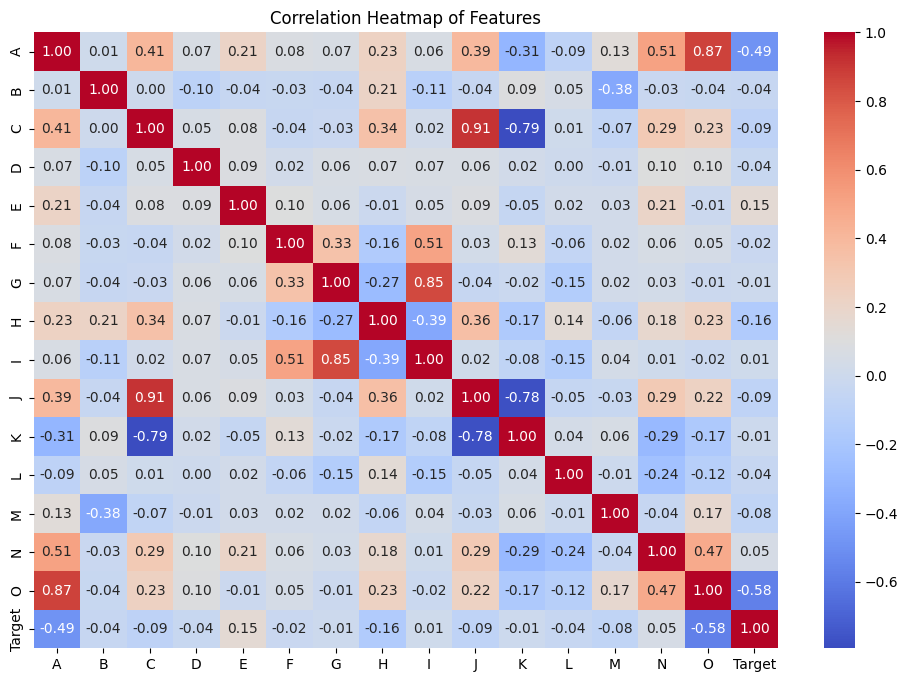

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


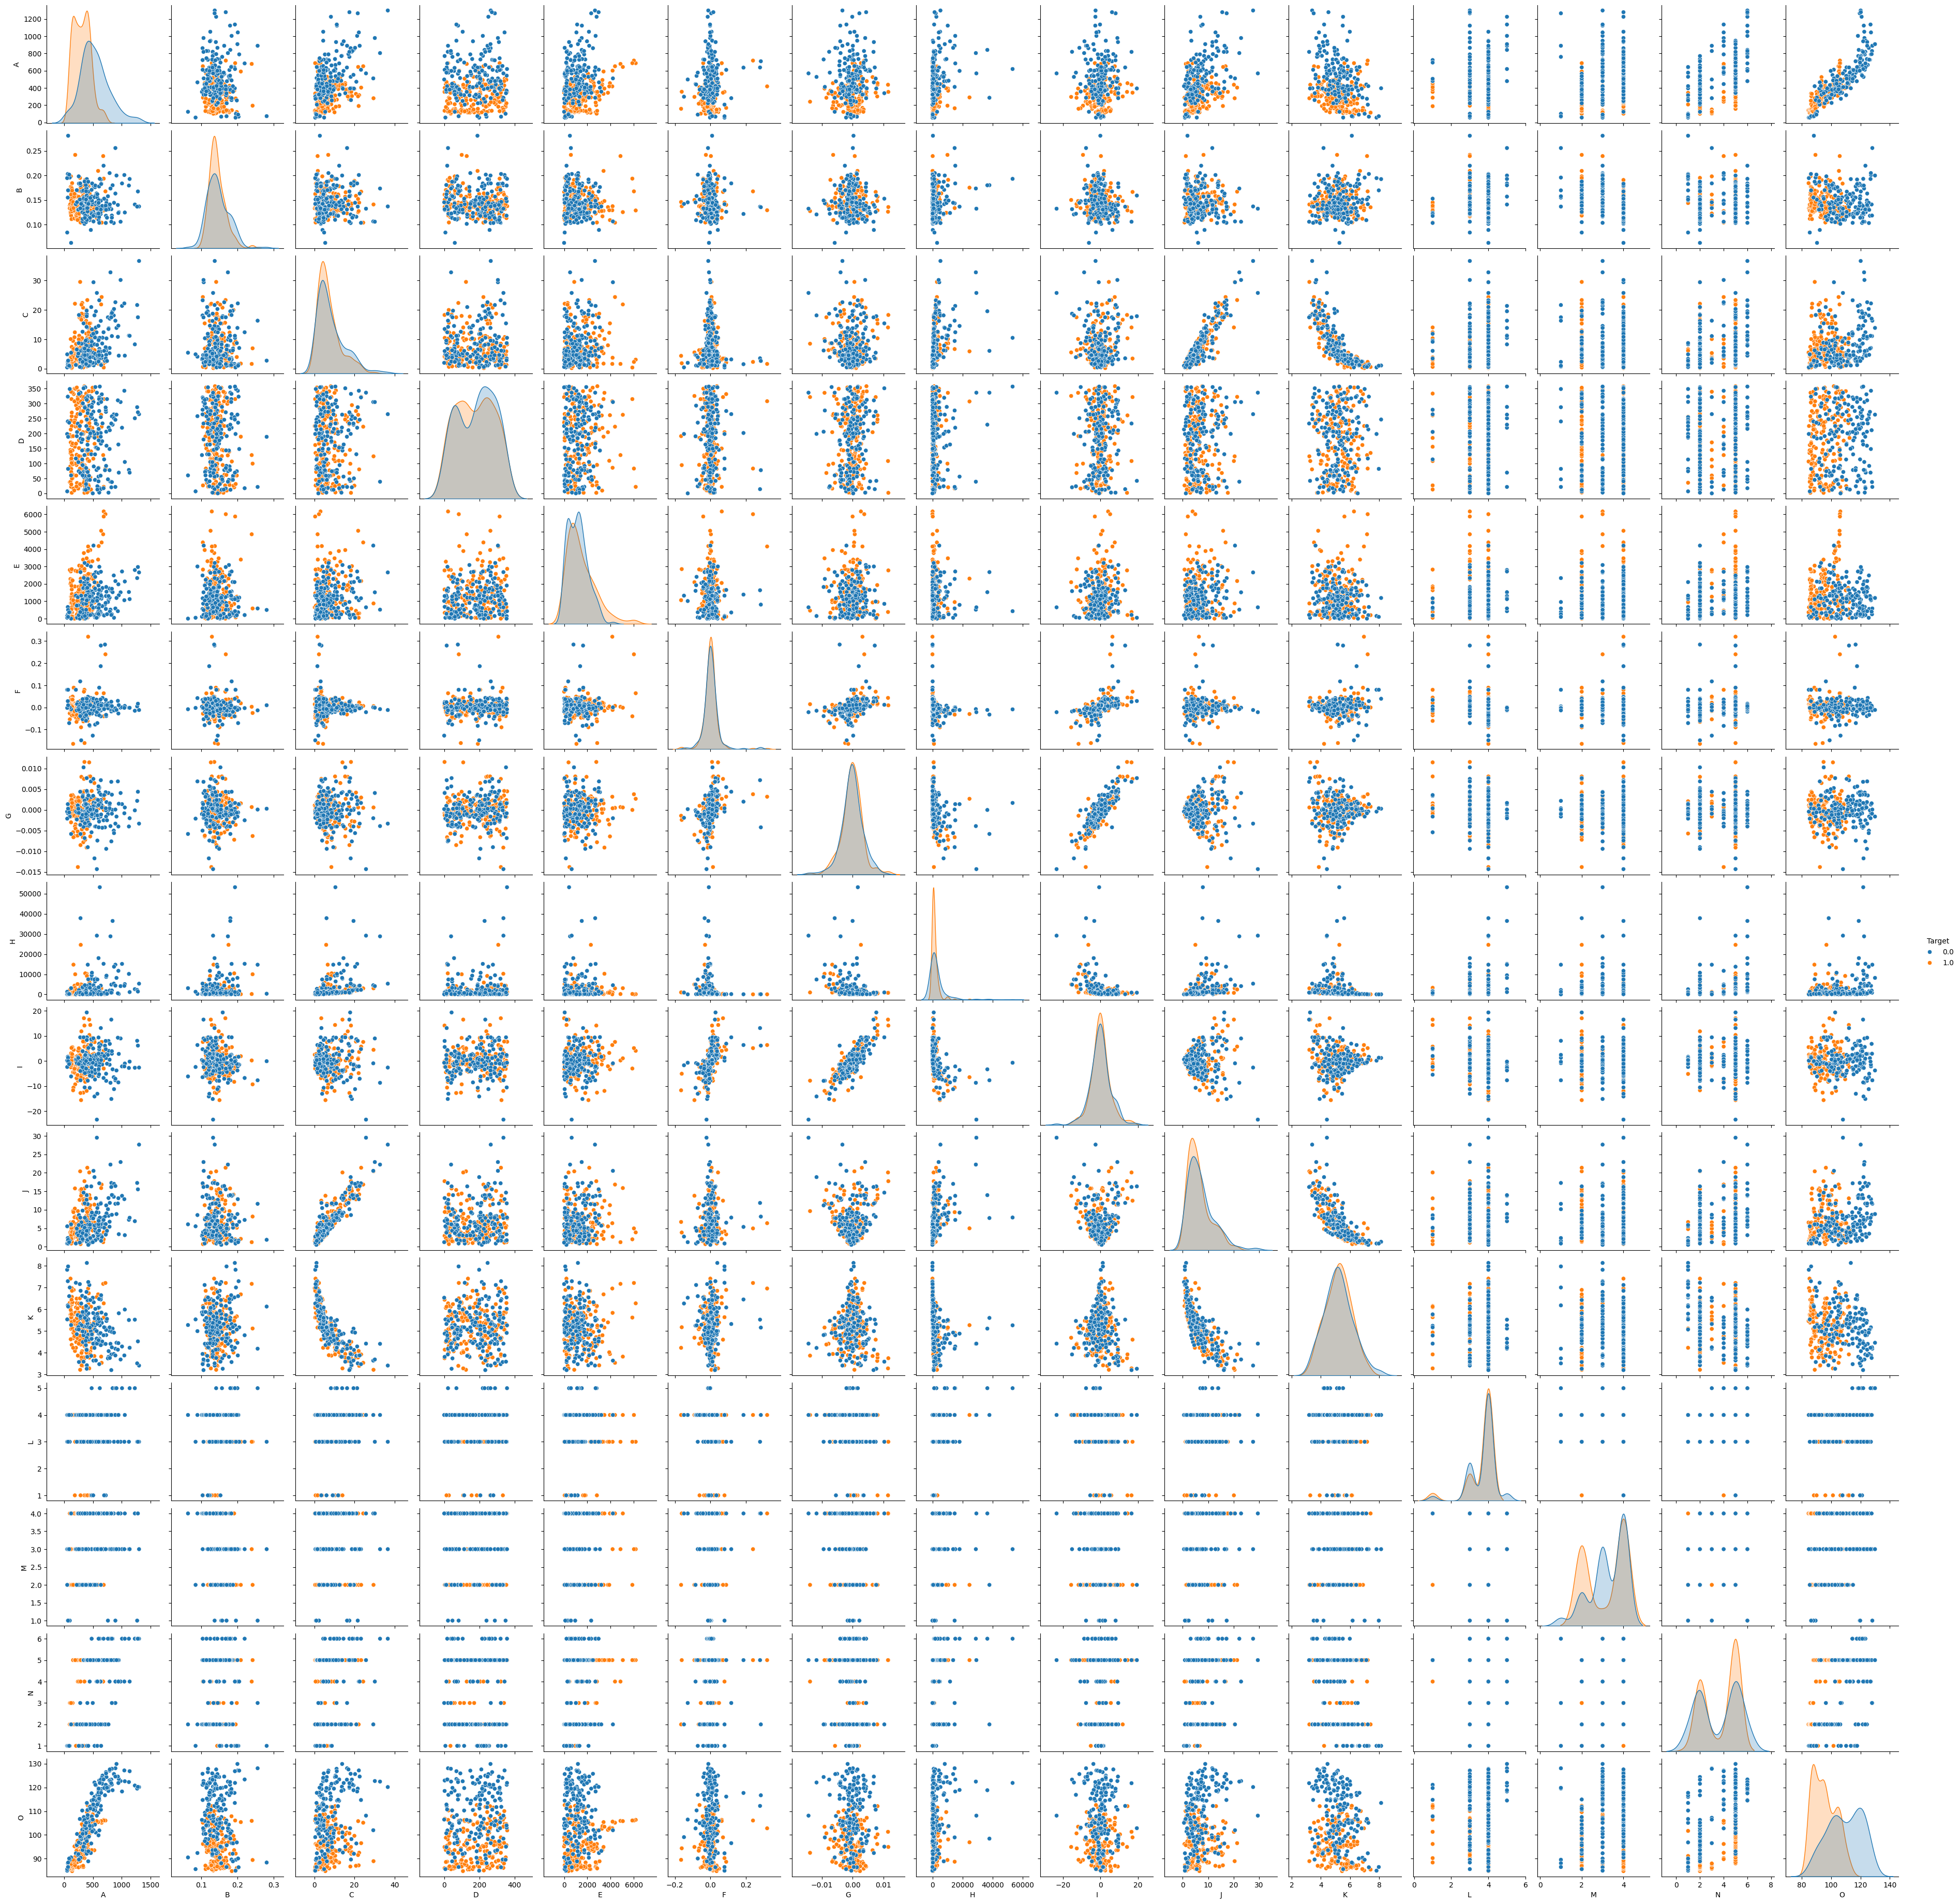

In [21]:
sns.pairplot(data, hue='Target')  # replace 'Target' with the name of your categorical variable, if any
plt.show()


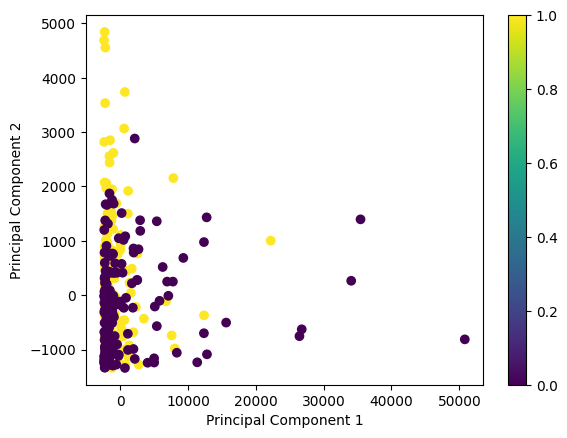

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(data.drop('Target', axis=1))

plt.scatter(components[:, 0], components[:, 1], c=data['Target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


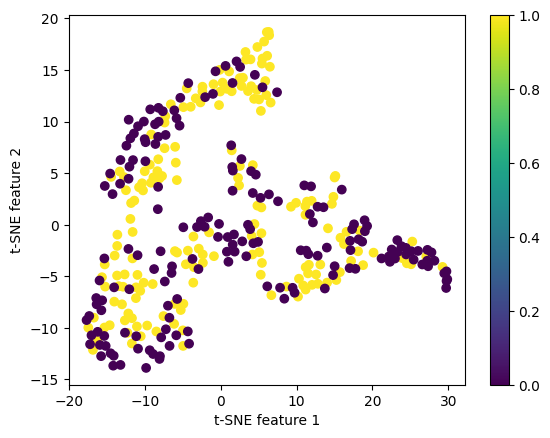

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(data.drop('Target', axis=1))

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Target'])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()


In [3]:
# Assuming `data` is your pandas DataFrame from which `X` (features) and `y` (target) are derived
X = data.drop(columns=['Target']).values  # Convert DataFrame to NumPy array for features
y = data['Target'].values  # Convert Series to NumPy array for target


# Split the dataset into training and testing sets (optional if only training is needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Set the number of qubits, depth of the circuit, and time step
n_qubit = 5
depth = 3
time_step = 0.5

# Choose the solver (optimizer) for the quantum circuit
solver = Bfgs()  # Adam(), NelderMead(), or Bfgs() can be used

# Set the maximum number of iterations for the solver
maxiter = 200

# Create the quantum circuit ansatz
circuit = create_qcl_ansatz(n_qubit, depth, time_step, 0)

# Initialize the QNNRegressor model
model = QNNRegressor(circuit, solver, cost='mse', do_x_scale=True, do_y_scale=True, x_norm_range=0.6, y_norm_range=0.7)

# Train the model on the training data
opt_loss, theta = model.fit(X_train, y_train, maxiter)

# Print the trained parameters and loss
print("Trained parameters:", theta)
print("Loss:", opt_loss)

Trained parameters: [ 4.22249402  1.25621076 -1.1850681  -0.12421711  5.14613898  6.48468473
  4.73821077  3.24926783  4.81119197  6.86164181  5.4300568   0.49498631
  5.60860407 -0.22814147  4.29967575  1.2787589   6.62282215  3.81398675
  3.14909732  2.52420998 -0.41259391  0.53993806  5.96015454  3.20793384
  2.87025967  1.42345369  4.8449697   5.37797914  5.75495233  5.02487535
  3.92390823  1.33157844  1.01920994  4.53324494  3.30089856  1.94930719
  3.05259359  5.58881689  5.8687685   2.24809352  3.59102784  2.02236503
  3.73409722  2.12315885  2.46061475]
Loss: 0.36960770612786337


In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred


array([[0.45413808],
       [0.52606085],
       [0.27293013],
       [0.63295128],
       [0.44330303],
       [0.57491857],
       [0.49883485],
       [0.39796458],
       [0.39499512],
       [0.43910144],
       [0.5972642 ],
       [0.57527469],
       [0.36969824],
       [0.47959148],
       [0.45019251],
       [0.4256197 ],
       [0.04888847],
       [0.57412792],
       [0.68147813],
       [0.47063079],
       [0.67825279],
       [0.53172181],
       [0.47747553],
       [0.65842899],
       [0.49401288],
       [0.67045433],
       [0.62254772],
       [0.53284667],
       [0.57428343],
       [0.40172449],
       [0.54474149],
       [0.46645107],
       [0.66711736],
       [0.36698874],
       [0.26438091],
       [0.71214275],
       [0.68431719],
       [0.67587381],
       [0.1443362 ],
       [0.15112751],
       [0.50329112],
       [0.55525502],
       [0.42919587],
       [0.57120365],
       [0.51768927],
       [0.5397913 ],
       [0.65755669],
       [0.579

In [10]:
# Compute the mean squared error (MSE) on the test data
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error (MSE) on test data:", mse)

Mean Squared Error (MSE) on test data: 0.26836630831401936


MSE of 0.268 might be considered acceptable or even good, depending on the specific problem and the level of noise or variability in the data.

In [11]:
# RMSE and MAPE
rmse = 0

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('qubit = ',n_qubit,', depth = ', depth)
print('RMSE = ',rmse(y_pred,y_test))

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))

qubit =  5 , depth =  3
RMSE =  0.5180408365312713
MAPE =  866888811154187.9


In [12]:
from skqulacs.circuit.pre_defined import create_qcl_ansatz
from qulacsvis import circuit_drawer
from skqulacs.circuit.pre_defined import create_farhi_neven_ansatz

n_qubit = 5
c_depth = 3
ansatz = create_farhi_neven_ansatz(n_qubit, c_depth)
circuit_drawer(ansatz._circuit)

print(circuit_drawer(ansatz._circuit, "latex_source"))


###################################################################################################
>> 0
   ___     ___                                                                                     
  |pRY|   |pRZ|                                                                                   |
--|   |---|   |-----------------------------------------------------●-----------------------●-----|
  |___|   |___|                                                     |                       |     |
   ___     ___                                                      |                       |      
  |pRY|   |pRZ|                                                     |                       |      
--|   |---|   |-----------------------------------------------------|-----------------------|------
  |___|   |___|                                                     |                       |      
   ___     ___     ___     ___     ___     ___     ___     ___      |                       | 

In [13]:
from skqulacs.circuit.pre_defined import create_ibm_embedding_circuit

n_qubit = 3
circuit = create_ibm_embedding_circuit(n_qubit)
circuit_drawer(circuit._circuit)


###################################################################################################
>> 0
   ___     ___                                                                     ___     ___     
  | H |   |pRZ|                                                                   |CX |   |pRZ|   |
--|   |---|   |-----●---------------●---------------------------------------------|   |---|   |---|
  |___|   |___|     |               |                                             |___|   |___|   |
   ___             _|_     ___     _|_     ___                                      |              
  | H |           |CX |   |pRZ|   |CX |   |pRZ|                                     |              
--|   |-----------|   |---|   |---|   |---|   |-----●---------------●---------------|--------------
  |___|           |___|   |___|   |___|   |___|     |               |               |              
   ___                                             _|_     ___     _|_     ___      |         

In [14]:
print(circuit_drawer(ansatz._circuit, "latex_source"))


\documentclass[border={-2pt 5pt 5pt -7pt}]{standalone}
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
    \Qcircuit @C=1.0em @R=0.7em @!R{ \\
        \nghost{ q_{0} : } & \lstick{ q_{0} : } & \gate{pRY} & \gate{pRZ} & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{3} & \qw & \qw & \ctrl{3} & \targ & \gate{pRX} & \gate{pRY} & \targ & \gate{pRY} & \gate{pRX} & \qw & \qw & \targ & \gate{pRX} & \gate{pRY} & \targ & \gate{pRY} & \gate{pRX} & \qw & \qw & \qw & \qw & \qw\\
        \nghost{ q_{1} : } & \lstick{ q_{1} : } & \gate{pRY} & \gate{pRZ} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{-1} & \qw & \qw & \ctrl{-1} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \targ & \gate{pRX} & \gate{pRY} & \targ & \gate{pRY} & \gate{pRX} & \qw\\
        \nghost{ q_{2} : } & \lstick{ q_{2} : } & \gate{pRY} & \gate{pRZ} & \targ & \gate{pRX} & \gate{pRY} & \targ & \gate{pRY} & \gate{pRX} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \q